In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
X_train=np.linspace(-1,1,20)

In [3]:
y_train = np.array([-0.6561, -0.3099, -0.59035, -0.50855, -0.285 ,
-0.2443 , -0.02445, 0.00135, -0.2006 , 0.07475,
-0.1422 , 0.06515, 0.15265, 0.3521, 0.28415,
0.5524 , 0.23115, 0.20835, 0.4211, 0.60485])

In [4]:
X_test = np.linspace(-1, 1, 20)

In [5]:

y_test = np.array([-0.69415, -0.451 , -0.43005, -0.4484, -0.1475,
-0.5019, -0.28055, 0.24595, -0.21425, -0.0286 ,
0.23415, 0.46575, 0.07955, 0.1973 , 0.0719,
0.3639 , 0.5536 , 0.3365 , 0.50705, 0.33435])

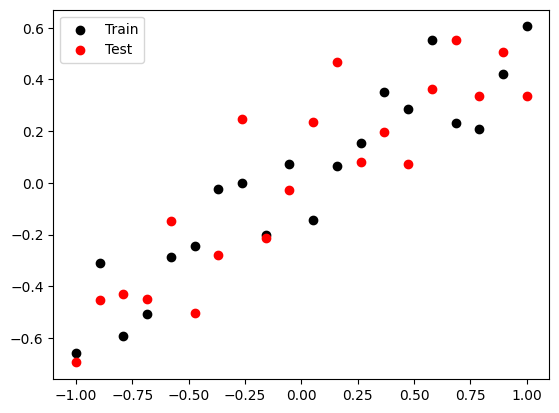

In [9]:
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.legend()
plt.show()

In [10]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="linear"))

adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])



c:\Users\sinha\anaconda3\envs\ENV1\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
history = model.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test), verbose=False)

In [14]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.0024709899444133043, Test: 0.04561939090490341


In [15]:
y_pred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


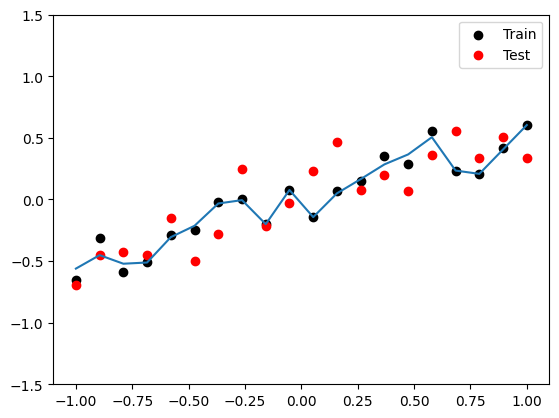

In [22]:
plt.figure()
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

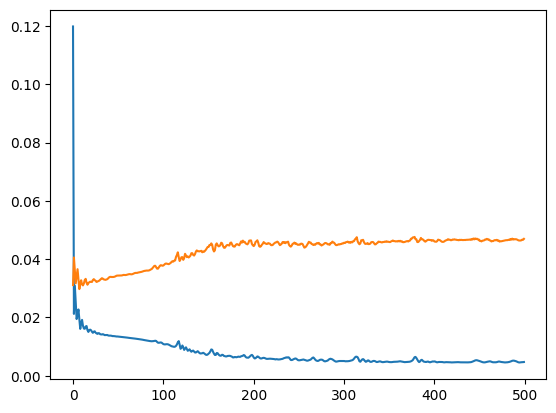

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss' ])

<h1>Dropout Layers</h1>

In [23]:
model = Sequential()

model.add(Dense(128, input_dim=1, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="linear"))
adam = Adam(learning_rate=0.01)
model.compile(loss='mse', optimizer=adam, metrics=['mse'])


c:\Users\sinha\anaconda3\envs\ENV1\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
history = model.fit(X_train, y_train, epochs=500, validation_data = (X_test, y_test), verbose=False)

In [36]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: {}, Test: {}'.format(train_mse, test_mse))

Train: 0.011591884307563305, Test: 0.035759251564741135


In [38]:
y_pred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


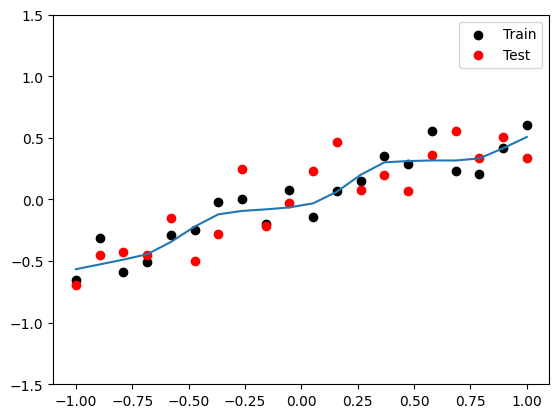

In [39]:
plt.figure()
plt.scatter(X_train, y_train, c='black', label='Train')
plt.scatter(X_test, y_test, c='red', label='Test')
plt.plot(X_test, y_pred)
plt.legend()
plt.ylim((-1.5,1.5))
plt.show()

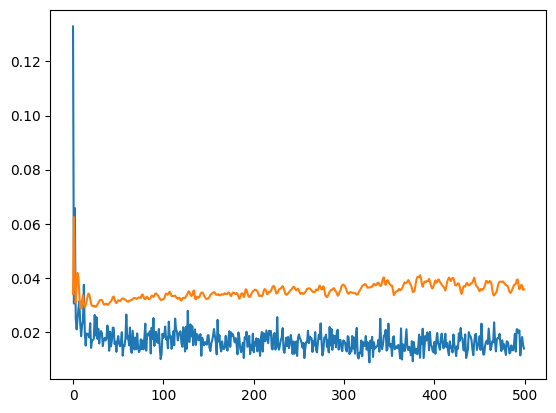

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss' ])